# Лабораторна робота №6 "Застосування numpy"

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
plt.rcParams['figure.figsize'] = [8, 6]

## Генерація двовимірних даних

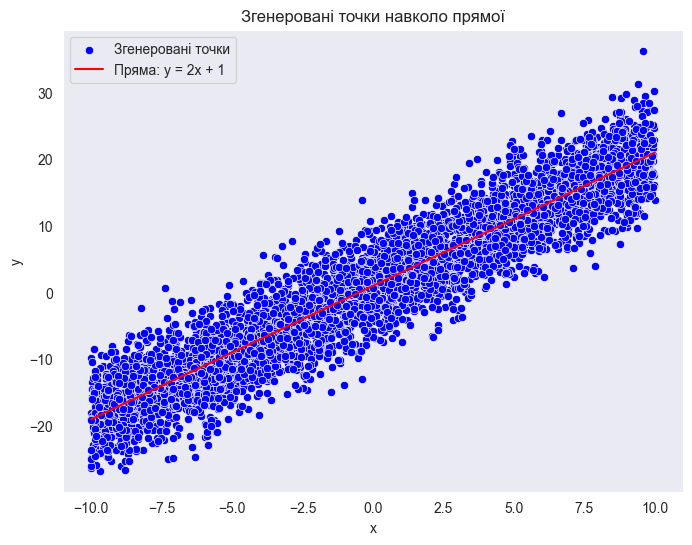

In [53]:
k, b = 2, 1
points_amount = 5000
x = np.random.uniform(-10, 10, points_amount)
noise = np.random.normal(0, 4, points_amount)
y = k * x + b + noise

sns.scatterplot(x=x, y=y, color='blue', label='Згенеровані точки')
sns.lineplot(x=x, y=k*x + b, color='red', label=f'Пряма: y = {k}x + {b}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Згенеровані точки навколо прямої')
plt.legend()
plt.grid()
plt.show()

## Метод найменших квадратів

In [54]:
def least_squares(x_p, y_p):
    mean_x, mean_y = np.mean(x_p), np.mean(y_p)
    b1 = sum((x_p - mean_x) * (y_p - mean_y)) / sum((x_p - mean_x) ** 2)
    b0 = mean_y - b1 * mean_x
    return b0, b1

### Результати

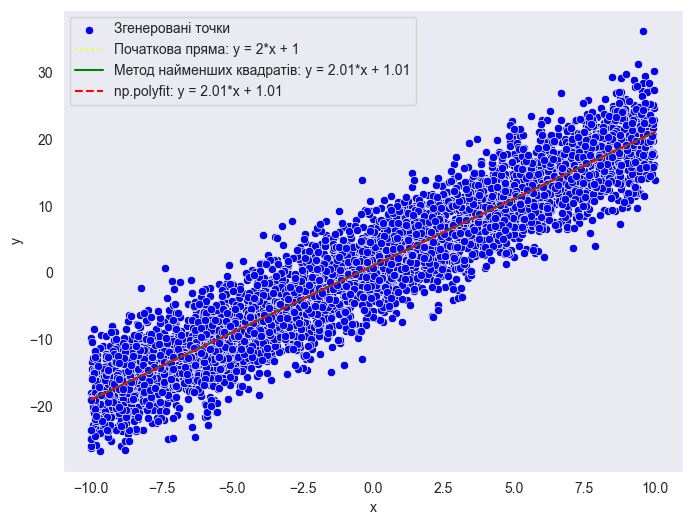

In [100]:
beta_0, beta_1 = least_squares(x, y)
y_pr = beta_1*x + beta_0

beta_1_pol, beta_0_pol = np.polyfit(x, y, 1)

sns.scatterplot(x=x, y=y, color='blue', label='Згенеровані точки')
sns.lineplot(x=x, y=k*x + b, color='yellow',  linestyle='dotted',
             label=f'Початкова пряма: y = {k}*x + {b}')
sns.lineplot(x=x, y=beta_0 + beta_1 * x, color='green',
             label=f'Метод найменших квадратів: y = {beta_1:.2f}*x + {beta_0:.2f}')
sns.lineplot(x=x, y=beta_0_pol + beta_1_pol*x, color='red', linestyle='dashed',
             label=f'np.polyfit: y = {beta_1_pol:.2f}*x + {beta_0_pol:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

## Метод градієнтного спуску

In [96]:
n_iter = 1000


def gradient_descent(learning_rate=0.01):
    b_0, b_1 = 0, 0

    losses = []

    for _ in range(n_iter):
        y_pred = b_0 + b_1 * x

        difference = y - y_pred
        grad_b_0 = (-2 / points_amount) * np.sum(difference)
        grad_b_1 = (-2 / points_amount) * np.sum(x * difference)

        b_0 -= learning_rate * grad_b_0
        b_1 -= learning_rate * grad_b_1

        losses.append(np.mean(difference ** 2))

    return b_0, b_1, losses

### Зміна похибки в залежності від кількості ітерацій

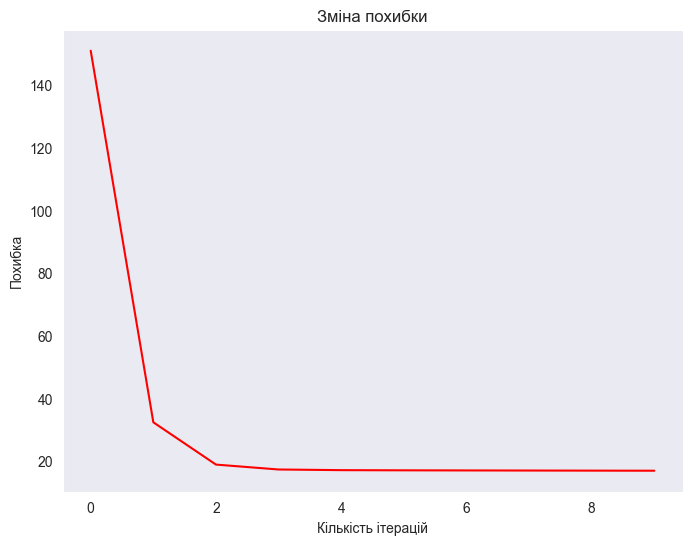

In [97]:
b0, b1, loss_list = gradient_descent()
sns.lineplot(x=range(n_iter)[0:10], y=loss_list[0:10], color='red')
plt.xlabel('Кількість ітерацій')
plt.ylabel('Похибка')
plt.title('Зміна похибки')
plt.grid()
plt.show()

### Порівняння результатів

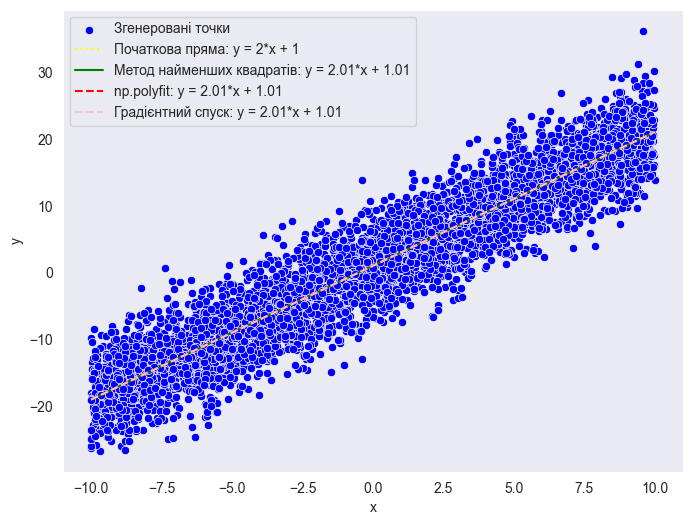

In [99]:
sns.scatterplot(x=x, y=y, color='blue', label='Згенеровані точки')
sns.lineplot(x=x, y=k*x + b, color='yellow',  linestyle='dotted',
             label=f'Початкова пряма: y = {k}*x + {b}')
sns.lineplot(x=x, y=beta_0 + beta_1 * x, color='green',
             label=f'Метод найменших квадратів: y = {beta_1:.2f}*x + {beta_0:.2f}')
sns.lineplot(x=x, y=beta_0_pol + beta_1_pol*x, color='red', linestyle='dashed',
             label=f'np.polyfit: y = {beta_1_pol:.2f}*x + {beta_0_pol:.2f}')
sns.lineplot(x=x, y=b0 + b1*x, color='pink', linestyle='dashed',
             label=f'Градієнтний спуск: y = {b1:.2f}*x + {b0:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()